In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-nlsq-converge)

We will observe the convergence of {numref}`Function {number} <function-levenberg>` for different levels of the minimum least-squares residual. We start with a function mapping from $\real^2$ into $\real^3$, and a point that will be near the optimum.

In [2]:
g = lambda x: array([sin(x[0] + x[1]), cos(x[0] - x[1]), exp(x[0] - x[1])])
p = array([1, 1])

The function $\mathbf{g}(\mathbf{x}) - \mathbf{g}(\mathbf{p})$ obviously has a zero residual at $\mathbf{p}$. We'll make different perturbations of that function in order to create nonzero residuals.

/Users/driscoll/Documents/GitHub/fnc/python/fncbook/fncbook/chapter04.py:167: UserWarning: Iteration did not find a root.
  warnings.warn("Iteration did not find a root.")


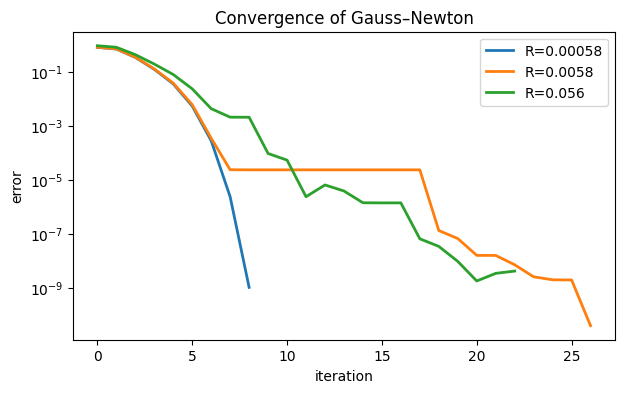

In [3]:
for R in [1e-3, 1e-2, 1e-1]:
    # Define the perturbed function.
    f = lambda x: g(x) - g(p) + R * array([-1, 1, -1]) / sqrt(3)
    x = FNC.levenberg(f, [0, 0])
    r = x[-1]
    err = [norm(x[j] - r) for j in range(len(x) - 1)]
    normres = norm(f(r))
    semilogy(err, label=f"R={normres:.2g}")
title("Convergence of Gauss–Newton")
xlabel("iteration"), ylabel("error")
legend();

In the least perturbed case, where the minimized residual is less than $10^{-3}$, the convergence is plausibly quadratic. At the next level up, the convergence starts similarly but suddenly stagnates for a long time. In the most perturbed case, the quadratic phase is nearly gone and the overall shape looks linear.